In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("D:/Desktop/train(1).csv")

In [3]:
copy = data.copy()
copy.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
copy["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
copy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:

copy["Embarked"].fillna('S',inplace = True)
copy["Embarked"].isna().sum()

0

In [9]:
eb=[]
gender =[]
for i in range(891):
    if copy["Embarked"][i]== "S":
        eb.append(0)
    if copy["Embarked"][i] == "Q":
        eb.append(1)
    if copy["Embarked"][i] =="C":
        eb.append(2)
    if copy["Sex"][i] == "male":
        gender.append(0)
    if copy["Sex"][i] == "female":
        gender.append(1)
    
    
len(gender)
len(eb)

891

In [10]:
copy.insert(12,"eb" , eb , True)
copy.insert(13,"gender" , gender , True)

In [11]:
copy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,eb,gender
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.013128,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.167675,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.162098,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.030394,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.068230,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.039798,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.224719,0.182333
eb,-0.013128,0.167675,-0.162098,0.030394,-0.068230,-0.039798,0.224719,1.000000,0.108262
gender,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.108262,1.000000


In [12]:
copy["Age"].fillna(29.699, inplace = True)
copy["Age"].isna().sum()

0

In [13]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  eb           891 non-null    int64  
 13  gender       891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [14]:
array = []
title = []
for i in range(891):
    array = copy["Name"][i].split()
    title.append(array[1])
print(len(title))
tag = np.zeros(891)
for i in range(891):
    if title[i] == "Mr.":
        tag[i] = 1
        
    if title[i] == "Mrs.":
        tag[i] = 2
       
    if title[i] == "Miss.":
        tag[i] = 3
        
    if title[i] == "Master.":
        tag[i] = 4
        


891


In [15]:
copy.insert(14,"Tag" , tag , True)

In [16]:
copy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,eb,gender,Tag
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.013128,-0.042939,-0.083138
Survived,-0.005007,1.000000,-0.338481,-0.069808,-0.035322,0.081629,0.257307,0.167675,0.543351,0.434467
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.162098,-0.131900,0.021635
Age,0.033207,-0.069808,-0.331339,1.000000,-0.232625,-0.179190,0.091566,0.026748,-0.084153,-0.394098
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.068230,0.114631,0.308276
Parch,-0.001652,0.081629,0.018443,-0.179190,0.414838,1.000000,0.216225,-0.039798,0.245489,0.339946
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.224719,0.182333,0.138053
eb,-0.013128,0.167675,-0.162098,0.026748,-0.068230,-0.039798,0.224719,1.000000,0.108262,0.045098
gender,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,0.108262,1.000000,0.631611
Tag,-0.083138,0.434467,0.021635,-0.394098,0.308276,0.339946,0.138053,0.045098,0.631611,1.000000


In [17]:
e1 = np.zeros(891)
e2 = np.zeros(891)
e3 = np.zeros(891)
for i in range(891):
    if copy["eb"][i] == 0:
        e1[i] = 1
    if copy["eb"][i] == 1:
        e2[i] = 1
    if copy["eb"][i] == 2:
        e3[i] = 1
copy.insert(15,"E1" , e1 , True)
copy.insert(16,"E2" , e2 , True)
copy.insert(17,"E3" , e3 , True)
copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  eb           891 non-null    int64  
 13  gender       891 non-null    int64  
 14  Tag          891 non-null    float64
 15  E1           891 non-null    float64
 16  E2           891 non-null    float64
 17  E3           891 non-null    float64
dtypes: float64(6), int64(7), object(5)
memory usage: 1

In [18]:
copy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,eb,gender,Tag,E1,E2,E3
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.013128,-0.042939,-0.083138,0.022204,-0.033606,-0.001205
Survived,-0.005007,1.000000,-0.338481,-0.069808,-0.035322,0.081629,0.257307,0.167675,0.543351,0.434467,-0.149683,0.003650,0.168240
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.162098,-0.131900,0.021635,0.074053,0.221009,-0.243292
Age,0.033207,-0.069808,-0.331339,1.000000,-0.232625,-0.179190,0.091566,0.026748,-0.084153,-0.394098,-0.019335,-0.013856,0.032024
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.068230,0.114631,0.308276,0.068734,-0.026354,-0.059528
Parch,-0.001652,0.081629,0.018443,-0.179190,0.414838,1.000000,0.216225,-0.039798,0.245489,0.339946,0.060814,-0.081228,-0.011069
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.224719,0.182333,0.138053,-0.162184,-0.117216,0.269335
eb,-0.013128,0.167675,-0.162098,0.026748,-0.068230,-0.039798,0.224719,1.000000,0.108262,0.045098,-0.951474,0.208581,0.936273
gender,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,0.108262,1.000000,0.631611,-0.119224,0.074115,0.082853
Tag,-0.083138,0.434467,0.021635,-0.394098,0.308276,0.339946,0.138053,0.045098,0.631611,1.000000,-0.079161,0.124619,0.000843


In [19]:
new = np.zeros(891)
for i in range(891):
    if copy["SibSp"][i] + copy["Parch"][i] > 0:
        new[i] = 1


In [20]:
copy.insert(18,"Family" , new , True)

In [21]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  eb           891 non-null    int64  
 13  gender       891 non-null    int64  
 14  Tag          891 non-null    float64
 15  E1           891 non-null    float64
 16  E2           891 non-null    float64
 17  E3           891 non-null    float64
 18  Family       891 non-null    float64
dtypes: float

In [22]:
limit = np.zeros(891)
for i in range(891):
    if copy["Age"][i] < 15:
        limit[i] = 0
    if copy["Age"][i] > 15 and copy["Age"][i] < 60:
        limit[i] = 1
    if copy["Age"][i] > 60:
        limit[i] = 2


In [23]:
copy.insert(19,"LimitAge" , limit , True)

In [24]:
copy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,eb,gender,Tag,E1,E2,E3,Family,LimitAge
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.013128,-0.042939,-0.083138,0.022204,-0.033606,-0.001205,-0.057462,0.004439
Survived,-0.005007,1.000000,-0.338481,-0.069808,-0.035322,0.081629,0.257307,0.167675,0.543351,0.434467,-0.149683,0.003650,0.168240,0.203367,-0.142019
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.162098,-0.131900,0.021635,0.074053,0.221009,-0.243292,-0.135207,-0.148965
Age,0.033207,-0.069808,-0.331339,1.000000,-0.232625,-0.179190,0.091566,0.026748,-0.084153,-0.394098,-0.019335,-0.013856,0.032024,-0.179775,0.660070
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.068230,0.114631,0.308276,0.068734,-0.026354,-0.059528,0.584471,-0.327481
Parch,-0.001652,0.081629,0.018443,-0.179190,0.414838,1.000000,0.216225,-0.039798,0.245489,0.339946,0.060814,-0.081228,-0.011069,0.583398,-0.310326
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.224719,0.182333,0.138053,-0.162184,-0.117216,0.269335,0.271832,0.004110
eb,-0.013128,0.167675,-0.162098,0.026748,-0.068230,-0.039798,0.224719,1.000000,0.108262,0.045098,-0.951474,0.208581,0.936273,0.063532,-0.028498
gender,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,0.108262,1.000000,0.631611,-0.119224,0.074115,0.082853,0.303646,-0.124264
Tag,-0.083138,0.434467,0.021635,-0.394098,0.308276,0.339946,0.138053,0.045098,0.631611,1.000000,-0.079161,0.124619,0.000843,0.321712,-0.477766


In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV

In [69]:
y = copy['Survived'].values
features = ["Pclass" , "gender" , "eb" , "Age" ,"Tag" ,"Parch" ,"SibSp" ,"E1" ,"E2","E3" ,"Family" ]#"gender" , "eb" , "Age", "Tag" ,"Parch", "SibSp" ,"E1" , "E3" ,"Family"]
x = copy[features].values

#Let's use train_test_split method for these values!

x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)
cross_val = train_test_split(x,y,test_size = 0.2 , random_state = 0)
#NOTE: random_state is just a wild guessed number and that has no motive in finding our solution:)

#I HAVE USED LOGISTIC REGRESSION, LINEAR REGRESSION, KN CLASSIFIER , RANDOM FOREST CLASSIFIER AND EXTRATREES CLASSIFIERS
#OUT OF THESE MANY TRAILS, RANDOM FOREST CLASSIFIER GAVE ME THE MAXIMUM ACCURACY. SO, I'M PICTURIZING ONLY THE RANDOM FOREST CODE.
#SINCE, MY PRIMARY NOTEBOOK IS JUPYTER, I AM WRITING THIS CODE FRESHLY IN SUBLIMETEXT FOR UPLOADING TO YOU, 

print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(712, 11) (712,) (179, 11) (179,)


In [27]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
parameter_grid = {'max_depth' : [6,8,10,12,15] , 'n_estimators' : [200,250,300,350,400,450,500,550,600]}

In [28]:
gs = GridSearchCV(estimator = clf1 , cv = 5 , param_grid= parameter_grid)

In [29]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [30]:
pd.DataFrame(gs.cv_results_).head(60)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.657828,0.161636,0.048469,0.011150,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.797203,0.874126,0.823944,0.823944,0.859155,0.835674,0.027514,1
1,0.931918,0.074568,0.062810,0.004714,6,250,"{'max_depth': 6, 'n_estimators': 250}",0.797203,0.874126,0.816901,0.823944,0.845070,0.831449,0.026259,7
2,1.003321,0.046840,0.072397,0.002572,6,300,"{'max_depth': 6, 'n_estimators': 300}",0.797203,0.874126,0.823944,0.816901,0.859155,0.834266,0.028249,2
3,1.470917,0.111525,0.115470,0.021948,6,350,"{'max_depth': 6, 'n_estimators': 350}",0.797203,0.874126,0.816901,0.816901,0.852113,0.831449,0.027729,7
4,1.710651,0.219887,0.100462,0.023908,6,400,"{'max_depth': 6, 'n_estimators': 400}",0.797203,0.874126,0.823944,0.816901,0.859155,0.834266,0.028249,2
5,1.623150,0.102088,0.115711,0.035107,6,450,"{'max_depth': 6, 'n_estimators': 450}",0.797203,0.874126,0.823944,0.816901,0.845070,0.831449,0.026259,7
6,2.155664,0.080785,0.124120,0.029813,6,500,"{'max_depth': 6, 'n_estimators': 500}",0.797203,0.874126,0.823944,0.823944,0.852113,0.834266,0.026435,2
7,2.189971,0.184260,0.136470,0.027252,6,550,"{'max_depth': 6, 'n_estimators': 550}",0.797203,0.874126,0.823944,0.816901,0.852113,0.832857,0.027126,6
8,2.232089,0.287069,0.134446,0.021508,6,600,"{'max_depth': 6, 'n_estimators': 600}",0.804196,0.874126,0.823944,0.816901,0.852113,0.834256,0.025376,5
9,0.782335,0.045140,0.053547,0.014144,8,200,"{'max_depth': 8, 'n_estimators': 200}",0.776224,0.874126,0.823944,0.809859,0.830986,0.823028,0.031747,18


In [70]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=600,max_depth=6)
        
        
        
        
        


#FITTING OUR DATA INTO IT
clf.fit(x_train,y_train)
    #PREDICTING THE OUTPUT PREDICTION CORRESPONDING TO x_test
y_predn=clf.predict(x_test)
print(accuracy_score(y_predn,y_test))
print(confusion_matrix(y_predn,y_test))


0.8324022346368715
[[99 19]
 [11 50]]


In [71]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

p = logreg.predict(x_test)
accuracy_score(p,y_test)

C:\Users\SRIVATHSA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8324022346368715

In [78]:

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)








from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)




#prediction
y_predd = classifier.predict(x_test)#Accuracy
accuracy_score(y_predd,y_test)

0.7988826815642458

In [33]:
Test = pd.read_csv("D:/Desktop/test_t.csv")
same = Test.copy()
same.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
same.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
ebc=[]
genderc =[]
for i in range(418):
    if same["Embarked"][i]== "S":
        ebc.append(0)
    if same["Embarked"][i] == "Q":
        ebc.append(1)
    if same["Embarked"][i] =="C":
        ebc.append(2)
    if same["Sex"][i] == "male":
        genderc.append(0)
    if same["Sex"][i] == "female":
        genderc.append(1)
    
    
len(genderc)


418

In [36]:

same.insert(11,"eb", ebc,True)
same.insert(12,"gender", genderc , True)

In [37]:
same.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,eb,gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1


In [38]:
same.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  eb           418 non-null    int64  
 12  gender       418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [39]:
same.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,eb,gender
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.598086,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.854496,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,2.000000,1.000000


In [40]:
same.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,eb,gender
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211,-0.040699,-0.023245
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147,-0.227983,-0.108615
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932,0.175848,-0.000013
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539,-0.052708,0.099943
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046,-0.054577,0.159120
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000,0.257183,0.191514
eb,-0.040699,-0.227983,0.175848,-0.052708,-0.054577,0.257183,1.000000,0.076281
gender,-0.023245,-0.108615,-0.000013,0.099943,0.159120,0.191514,0.076281,1.000000


In [41]:
same["Fare"].fillna(35.627 , inplace =True)
same["Fare"].isna().sum()

0

In [42]:
same.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  eb           418 non-null    int64  
 12  gender       418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


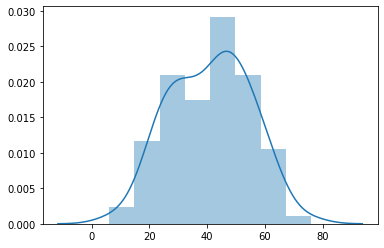

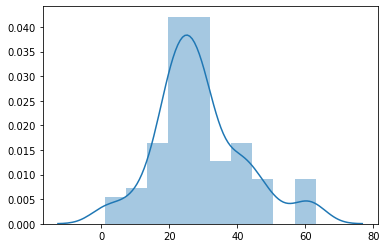

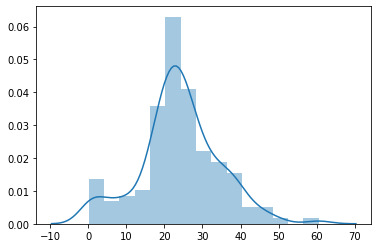

In [43]:
ag1= []
ag2 = []
ag3 = []
for i in range(418):
    if same["Pclass"][i] == 1:
        ag1.append(same["Age"][i])
    elif same["Pclass"][i] == 2:
        ag2.append(same["Age"][i])
    else:
        ag3.append(same["Age"][i])
sns.distplot(ag1)
plt.show()
sns.distplot(ag2)
plt.show()
sns.distplot(ag3)
plt.show()


In [44]:
nan = same["Age"].isna()
print(nan)
nan[417]

0      False
1      False
2      False
3      False
4      False
       ...  
413     True
414    False
415    False
416     True
417     True
Name: Age, Length: 418, dtype: bool


True

In [45]:
for i in range(418):
    if same["Pclass"][i] == 1:
        if nan[i] == True:
            same["Age"][i] = 50
    if same["Pclass"][i] == 2:
        if nan[i] == True:
            same["Age"][i] = 25
    if same["Pclass"][i] == 3:
        if nan[i] == True:
            same["Age"][i] = 22
print(same["Age"])

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    22.0
414    39.0
415    38.5
416    22.0
417    22.0
Name: Age, Length: 418, dtype: float64


C:\Users\SRIVATHSA\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\SRIVATHSA\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\SRIVATHSA\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [46]:
same.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  eb           418 non-null    int64  
 12  gender       418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [47]:
same.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,eb,gender
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.209330,0.447368,0.392344,35.627188,0.598086,0.363636
std,120.810458,0.841838,13.380851,0.896760,0.981429,55.840500,0.854496,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.500000,1.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,2.000000,1.000000


In [48]:
array1 = []
title1 = []
for i in range(418):
    array1 = same["Name"][i].split()
    title1.append(array[1])
print(len(title1))
tag1 = np.zeros(418)
for i in range(418):
    if title1[i] == "Mr.":
        tag1[i] = 1
        
    if title1[i] == "Mrs.":
        tag1[i] = 2
       
    if title1[i] == "Miss.":
        tag1[i] = 3
        
    if title1[i] == "Master.":
        tag1[i] = 4
        
len(tag1)

418


418

In [49]:
same.insert(13,"Tag" , tag1 , True)

In [50]:
same.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  eb           418 non-null    int64  
 12  gender       418 non-null    int64  
 13  Tag          418 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 45.8+ KB


In [51]:
es1 = np.zeros(418)
es2 = np.zeros(418)
es3 = np.zeros(418)
for i in range(418):
    if same["eb"][i] == 0:
        es1[i] = 1
    if same["eb"][i] == 1:
        es2[i] = 1
    if same["eb"][i] == 2:
        es3[i] = 1
same.insert(14,"E1" , es1 , True)
same.insert(15,"E2" , es2 , True)
same.insert(16,"E3" , es3 , True)
same.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  eb           418 non-null    int64  
 12  gender       418 non-null    int64  
 13  Tag          418 non-null    float64
 14  E1           418 non-null    float64
 15  E2           418 non-null    float64
 16  E3           418 non-null    float64
dtypes: float64(6), int64(6), object(5)
memory usage: 55.6+ KB


In [52]:
new1 = np.zeros(418)
for i in range(418):
    if same["SibSp"][i] + same["Parch"][i] > 0:
        new1[i] = 1


In [53]:
same.insert(17,"Family" , new1 , True)

In [54]:
same.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  eb           418 non-null    int64  
 12  gender       418 non-null    int64  
 13  Tag          418 non-null    float64
 14  E1           418 non-null    float64
 15  E2           418 non-null    float64
 16  E3           418 non-null    float64
 17  Family       418 non-null    float64
dtypes: float64(7), int64(6), object(5)
memory usage: 5

In [55]:
agelim = np.zeros(418)
for i in range(418):
    if same["Age"][i] < 15:
        agelim[i] = 0
    if same["Age"][i] > 15 and same["Age"][i] < 60:
        agelim[i] = 1
    if same["Age"][i] > 60:
        agelim[i] = 2 
    


In [56]:
same.insert(18,"LimitAge" , agelim , True)

In [72]:
x_testing = ["Pclass" , "gender" , "eb" , "Age" ,"Tag" ,"Parch" ,"SibSp" ,"E1","E2" ,"E3" ,"Family"]
x_testingdata = same[x_testing].values
predic = clf.predict(x_testingdata)
newp = logreg.predict(x_testingdata)
#Predicting the interest rate for test.csv
c=0
d=0
e=0
f=0
for i in range(418):
    if predic[i] == 0:
        c = c+1
    if predic[i] == 1:
        d = d+1
for i in range(418):
    if newp[i] == 0:
        e = e+1
    if newp[i] == 1:
        f = f+1    
    
print(c,d)
print(e,f)#Checking the composition of 1,2,3 in our output array!######################################
print(len(predic))  #Crosschecking the length of array for confirmation################################################

313 105
328 90
418


In [73]:
same["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [74]:
repeat = pd.read_csv("D:/Desktop/gender_submission.csv")
abc = repeat.copy()
repeat.drop("Survived",inplace = True ,axis = 1)
repeat.insert(1,"Survived", newp.astype(int),True)
repeat.to_csv("wiegehts.csv",index = False)

In [75]:
accuracy_score(newp,abc["Survived"])

0.8229665071770335